In [2]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from PIL import Image
from wordcloud import WordCloud

import nltk
import string
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import keras 
from keras.models import Sequential, Model 
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, Input, Embedding

In [3]:
dataset = pd.read_csv("flipkart_com-ecommerce_sample.csv")
dataset.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23 +0000,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati..."
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""..."
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23 +0000,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,Specifications of Sicons All Purpose Arnica Do...,No rating available,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",..."


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  20000 non-null  object 
 1   crawl_timestamp          20000 non-null  object 
 2   product_url              20000 non-null  object 
 3   product_name             20000 non-null  object 
 4   product_category_tree    20000 non-null  object 
 5   pid                      20000 non-null  object 
 6   retail_price             19922 non-null  float64
 7   discounted_price         19922 non-null  float64
 8   image                    19997 non-null  object 
 9   is_FK_Advantage_product  20000 non-null  bool   
 10  description              19998 non-null  object 
 11  product_rating           20000 non-null  object 
 12  overall_rating           20000 non-null  object 
 13  brand                    14136 non-null  object 
 14  product_specifications

In [5]:
for i in dataset.product_category_tree:
    dataset.replace(i, i.replace('["',''), inplace=True)
dataset.head()    

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"Clothing >> Women's Clothing >> Lingerie, Slee...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23 +0000,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,Furniture >> Living Room Furniture >> Sofa Bed...,SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati..."
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,Footwear >> Women's Footwear >> Ballerinas >> ...,SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""..."
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"Clothing >> Women's Clothing >> Lingerie, Slee...",SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23 +0000,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,Pet Supplies >> Grooming >> Skin & Coat Care >...,PSOEH3ZYDMSYARJ5,220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,Specifications of Sicons All Purpose Arnica Do...,No rating available,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",..."


In [6]:
for i in dataset.product_category_tree:
    dataset.replace(i, i.replace('"]',''), inplace=True)
dataset.head()         

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"Clothing >> Women's Clothing >> Lingerie, Slee...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23 +0000,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,Furniture >> Living Room Furniture >> Sofa Bed...,SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati..."
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,Footwear >> Women's Footwear >> Ballerinas >> ...,SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""..."
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"Clothing >> Women's Clothing >> Lingerie, Slee...",SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23 +0000,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,Pet Supplies >> Grooming >> Skin & Coat Care >...,PSOEH3ZYDMSYARJ5,220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,Specifications of Sicons All Purpose Arnica Do...,No rating available,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",..."


In [7]:
new = dataset["product_category_tree"].str.split(" >> ", n = 7, expand = True)
new

,0,1,2,3,4,5,6,7
0,Clothing,Women's Clothing,"Lingerie, Sleep & Swimwear",Shorts,Alisha Shorts,Alisha Solid Women's Cycling Shorts,None,None
1,Furniture,Living Room Furniture,Sofa Beds & Futons,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,None,None,None,None
2,Footwear,Women's Footwear,Ballerinas,AW Bellies,None,None,None,None
3,Clothing,Women's Clothing,"Lingerie, Sleep & Swimwear",Shorts,Alisha Shorts,Alisha Solid Women's Cycling Shorts,None,None
4,Pet Supplies,Grooming,Skin & Coat Care,Shampoo,Sicons All Purpose Arnica Dog Shampoo (500 ml),None,None,None
...,...,...,...,...,...,...,...,...
19995,Baby Care,Baby & Kids Gifts,Stickers,WallDesign Stickers,None,None,None,None
19996,Baby Care,Baby & Kids Gifts,Stickers,Wallmantra Stickers,None,None,None,None
19997,Baby Care,Baby & Kids Gifts,Stickers,Elite Collection Stickers,None,None,None,None
19998,Baby Care,Baby & Kids Gifts,Stickers,Elite Collection Stickers,None,None,None,None


In [8]:
new[0].nunique()

265

In [9]:
new[0].value_counts()

Clothing                                               6198
Jewellery                                              3531
Footwear                                               1227
Mobiles & Accessories                                  1099
Automotive                                             1012
                                                       ... 
Mast & Harbour Gold Synthetic  Clutch                     1
Asics Gel-Cumulus 17 Running Shoes                        1
Glacier Running Shoes                                     1
Starsy Solid Women's Round Neck Green T-Shirt             1
Areon Luxurious Fragrance Long Lasting Car,Home,...       1
Name: 0, Length: 265, dtype: int64

In [10]:
((new[0].value_counts())<=20).value_counts()

True     240
False     25
Name: 0, dtype: int64

In [11]:
dataset.drop(columns =["product_category_tree"], inplace = True)
dataset["category"] = new[0]

In [12]:
value_count= dataset["category"].value_counts()
to_remove = value_count[value_count<=20].index
dataset = dataset[dataset["category"].isin(to_remove)==False]
dataset["category"].value_counts()

Clothing                             6198
Jewellery                            3531
Footwear                             1227
Mobiles & Accessories                1099
Automotive                           1012
Home Decor & Festive Needs            929
Beauty and Personal Care              710
Home Furnishing                       700
Kitchen & Dining                      647
Computers                             578
Watches                               530
Baby Care                             483
Tools & Hardware                      391
Toys & School Supplies                330
Pens & Stationery                     313
Bags, Wallets & Belts                 265
Furniture                             180
Sports & Fitness                      166
Cameras & Accessories                  82
Home Improvement                       81
Health & Personal Care Appliances      43
Sunglasses                             40
Gaming                                 35
Pet Supplies                      

In [13]:
dataset.head()

,uniq_id,crawl_timestamp,product_url,product_name,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications,category
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ...",Clothing
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23 +0000,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati...",Furniture
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""...",Footwear
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ...",Clothing
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23 +0000,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,PSOEH3ZYDMSYARJ5,220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,Specifications of Sicons All Purpose Arnica Do...,No rating available,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",...",Pet Supplies


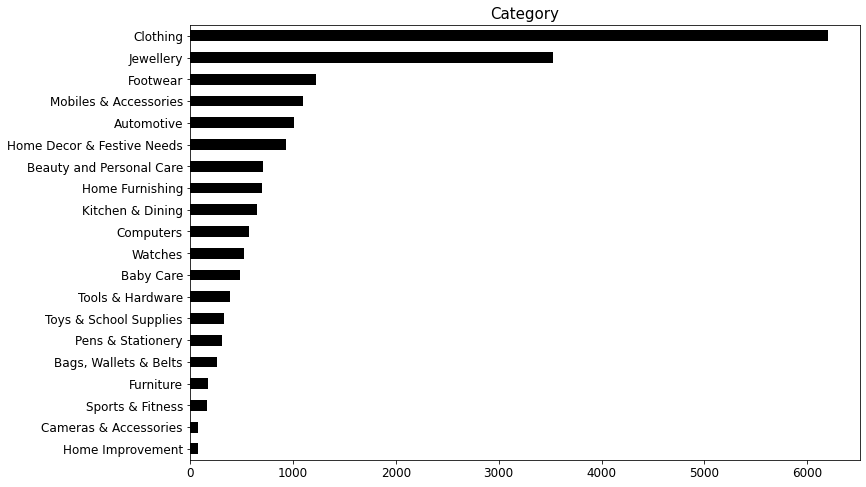

Top Ten Main Categories

Clothing                      6198
Jewellery                     3531
Footwear                      1227
Mobiles & Accessories         1099
Automotive                    1012
Home Decor & Festive Needs     929
Beauty and Personal Care       710
Home Furnishing                700
Kitchen & Dining               647
Computers                      578
Name: category, dtype: int64


In [14]:
plt.figure(figsize=(12,8))
dataset["category"].value_counts()[:20].sort_values(ascending=True).plot(kind="barh", color="black")
plt.title("Category",fontsize=15)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.show()
print("Top Ten Main Categories\n")
print(dataset["category"].value_counts()[:10])


In [15]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19624 entries, 0 to 19999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  19624 non-null  object 
 1   crawl_timestamp          19624 non-null  object 
 2   product_url              19624 non-null  object 
 3   product_name             19624 non-null  object 
 4   pid                      19624 non-null  object 
 5   retail_price             19549 non-null  float64
 6   discounted_price         19549 non-null  float64
 7   image                    19621 non-null  object 
 8   is_FK_Advantage_product  19624 non-null  bool   
 9   description              19622 non-null  object 
 10  product_rating           19624 non-null  object 
 11  overall_rating           19624 non-null  object 
 12  brand                    13775 non-null  object 
 13  product_specifications   19610 non-null  object 
 14  category              

In [16]:
dataset.dropna(axis = "index", subset=["description"], inplace=True)

In [17]:
dataset["description"] = dataset["description"].str.lower()

In [18]:
tokenizer = nltk.tokenize.RegexpTokenizer(r'[a-zA-Z]+')

In [19]:
descriptions = " ".join(desc for desc in dataset["description"])

tokenized_descriptions = tokenizer.tokenize(descriptions)
print(len(tokenized_descriptions))

1302365


In [20]:
dataset["tokenized_description"] = dataset.apply(lambda row: tokenizer.tokenize(row["description"]), axis=1)

In [21]:
dataset.tokenized_description

0        [key, features, of, alisha, solid, women, s, c...
1        [fabhomedecor, fabric, double, sofa, bed, fini...
2        [key, features, of, aw, bellies, sandals, wedg...
3        [key, features, of, alisha, solid, women, s, c...
4        [specifications, of, sicons, all, purpose, arn...
                               ...                        
19995    [buy, walldesign, small, vinyl, sticker, for, ...
19996    [buy, wallmantra, large, vinyl, stickers, stic...
19997    [buy, elite, collection, medium, acrylic, stic...
19998    [buy, elite, collection, medium, acrylic, stic...
19999    [buy, elite, collection, medium, acrylic, stic...
Name: tokenized_description, Length: 19622, dtype: object

In [22]:
def list_to_string (text):
    string = "".join(text)
    string = string.replace(" ", ", ")
    return string

In [23]:
dataset["tokenized_desc_0"] = dataset.apply(lambda row: list_to_string(row["description"]), axis=1)

In [24]:
dataset.tokenized_desc_0

0        key, features, of, alisha, solid, women's, cyc...
1        fabhomedecor, fabric, double, sofa, bed, (fini...
2        key, features, of, aw, bellies, sandals, wedge...
3        key, features, of, alisha, solid, women's, cyc...
4        specifications, of, sicons, all, purpose, arni...
                               ...                        
19995    buy, walldesign, small, vinyl, sticker, for, r...
19996    buy, wallmantra, large, vinyl, stickers, stick...
19997    buy, elite, collection, medium, acrylic, stick...
19998    buy, elite, collection, medium, acrylic, stick...
19999    buy, elite, collection, medium, acrylic, stick...
Name: tokenized_desc_0, Length: 19622, dtype: object

In [25]:
font = {'family': 'Times New Roman',
        'color':  'black',
        'weight': 'bold',
        'size': 18,
        }

def top_words(df, column, nb_top):
    count_keyword = dict()
    for index, col in df[column].iteritems():
        if isinstance(col, float):
            continue
        for word in col.split(','):
            if word in count_keyword.keys():
                count_keyword[word] += 1
            else:
                count_keyword[word] = 1

    keyword_top = []
    for k, v in count_keyword.items():
        keyword_top.append([k, v])
    keyword_top.sort(key=lambda x: x[1], reverse=True)

    return keyword_top[:nb_top]


 
def plot_world_cloud(df,
                     column,
                     nb_top):
    fig = plt.figure(1, figsize=(18, 12))
    ax1 = fig.add_subplot(1, 1, 1)

    words = dict()
    trunc_occurences = top_words(df, column, nb_top)
    for s in trunc_occurences:
        words[s[0]] = s[1]

    word_cloud = WordCloud(width=1000,
                           height=600,
                           normalize_plurals=False,
                           background_color='#000000',
                           colormap='Set2',
                           random_state=4
                           # mask=mask
                          )
    word_cloud.generate_from_frequencies(words)
    ax1.imshow(word_cloud, interpolation="bilinear")
    ax1.axis('off')
    plt.title("{} column word cloud (top {}) \n".format(
        column, nb_top), fontdict=font)
    plt.show()

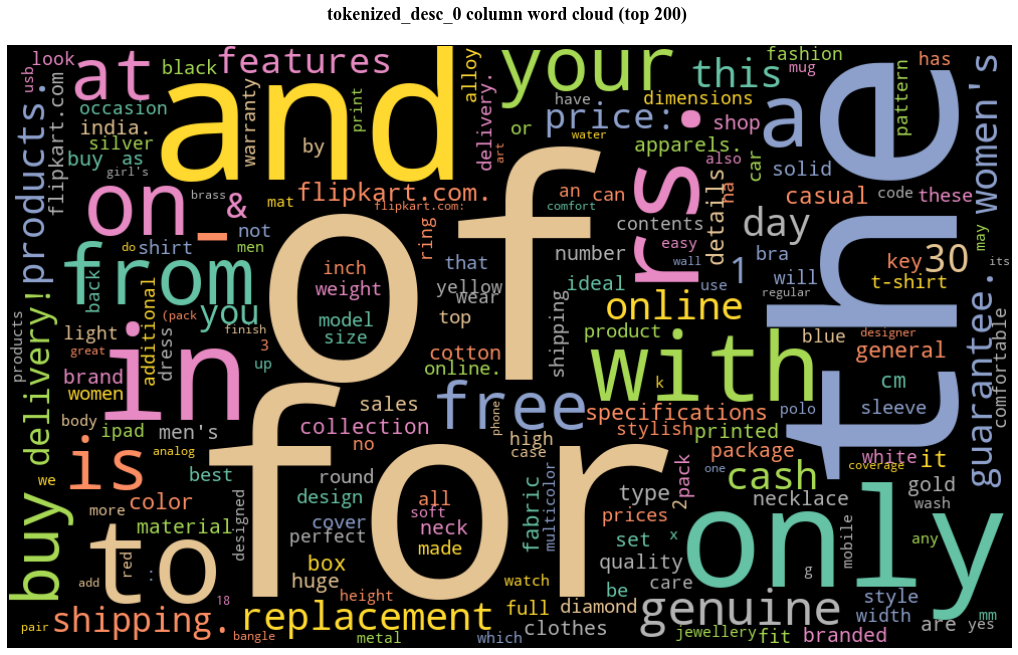

In [26]:
plot_world_cloud(df=dataset, column="tokenized_desc_0", nb_top=200)

In [27]:
nltk.download("punkt")
nltk.download("stopwords")
stop_words = set(stopwords.words('english'))

dataset["clean_tokenized_desc"] = dataset["tokenized_description"].apply(lambda x:[word for word in x if word not in stop_words and word.isalnum()])

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\MONSTER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\MONSTER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [28]:
dataset.clean_tokenized_desc

0        [key, features, alisha, solid, women, cycling,...
1        [fabhomedecor, fabric, double, sofa, bed, fini...
2        [key, features, aw, bellies, sandals, wedges, ...
3        [key, features, alisha, solid, women, cycling,...
4        [specifications, sicons, purpose, arnica, dog,...
                               ...                        
19995    [buy, walldesign, small, vinyl, sticker, rs, o...
19996    [buy, wallmantra, large, vinyl, stickers, stic...
19997    [buy, elite, collection, medium, acrylic, stic...
19998    [buy, elite, collection, medium, acrylic, stic...
19999    [buy, elite, collection, medium, acrylic, stic...
Name: clean_tokenized_desc, Length: 19622, dtype: object

In [29]:
def list_to_string_2 (text):
    string = ", ".join(text)
    return string

In [30]:
dataset["clean_tokenized_desc_0"] = dataset.apply(lambda row: list_to_string_2(row['clean_tokenized_desc']), axis=1)

In [31]:
dataset.clean_tokenized_desc_0

0        key, features, alisha, solid, women, cycling, ...
1        fabhomedecor, fabric, double, sofa, bed, finis...
2        key, features, aw, bellies, sandals, wedges, h...
3        key, features, alisha, solid, women, cycling, ...
4        specifications, sicons, purpose, arnica, dog, ...
                               ...                        
19995    buy, walldesign, small, vinyl, sticker, rs, on...
19996    buy, wallmantra, large, vinyl, stickers, stick...
19997    buy, elite, collection, medium, acrylic, stick...
19998    buy, elite, collection, medium, acrylic, stick...
19999    buy, elite, collection, medium, acrylic, stick...
Name: clean_tokenized_desc_0, Length: 19622, dtype: object

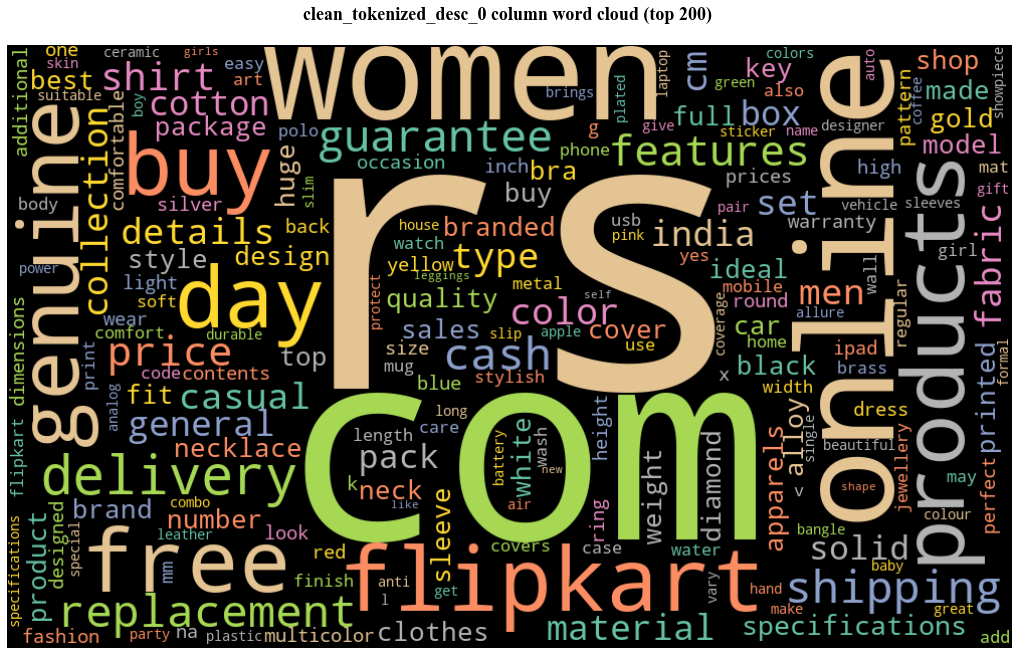

In [32]:
plot_world_cloud(df=dataset, column="clean_tokenized_desc_0", nb_top=200)

In [33]:
stemmer = PorterStemmer()
 
dataset["stemmed_clean_tokenized_desc"] = dataset.apply(lambda row : [stemmer.stem(word) for word in row["clean_tokenized_desc"]], axis=1)

In [34]:
dataset.stemmed_clean_tokenized_desc

0        [key, featur, alisha, solid, women, cycl, shor...
1        [fabhomedecor, fabric, doubl, sofa, bed, finis...
2        [key, featur, aw, belli, sandal, wedg, heel, c...
3        [key, featur, alisha, solid, women, cycl, shor...
4        [specif, sicon, purpos, arnica, dog, shampoo, ...
                               ...                        
19995    [buy, walldesign, small, vinyl, sticker, rs, o...
19996    [buy, wallmantra, larg, vinyl, sticker, sticke...
19997    [buy, elit, collect, medium, acryl, sticker, r...
19998    [buy, elit, collect, medium, acryl, sticker, r...
19999    [buy, elit, collect, medium, acryl, sticker, r...
Name: stemmed_clean_tokenized_desc, Length: 19622, dtype: object

In [35]:
nltk.download('omw-1.4')
lemmatizer = WordNetLemmatizer()

dataset["lemmed_clean_tokenized_desc"] = dataset.apply(lambda row : [lemmatizer.lemmatize(word, pos ='v') for word in row["clean_tokenized_desc"]], axis=1)

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\MONSTER\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [36]:
dataset.lemmed_clean_tokenized_desc

0        [key, feature, alisha, solid, women, cycle, sh...
1        [fabhomedecor, fabric, double, sofa, bed, fini...
2        [key, feature, aw, belly, sandals, wedge, heel...
3        [key, feature, alisha, solid, women, cycle, sh...
4        [specifications, sicons, purpose, arnica, dog,...
                               ...                        
19995    [buy, walldesign, small, vinyl, sticker, rs, o...
19996    [buy, wallmantra, large, vinyl, stickers, stic...
19997    [buy, elite, collection, medium, acrylic, stic...
19998    [buy, elite, collection, medium, acrylic, stic...
19999    [buy, elite, collection, medium, acrylic, stic...
Name: lemmed_clean_tokenized_desc, Length: 19622, dtype: object

In [37]:
dataset["lemmed_clean_tokenized_desc"] = dataset.apply(lambda row: list_to_string_2(row['lemmed_clean_tokenized_desc']), axis=1)

In [38]:
dataset.lemmed_clean_tokenized_desc

0        key, feature, alisha, solid, women, cycle, sho...
1        fabhomedecor, fabric, double, sofa, bed, finis...
2        key, feature, aw, belly, sandals, wedge, heel,...
3        key, feature, alisha, solid, women, cycle, sho...
4        specifications, sicons, purpose, arnica, dog, ...
                               ...                        
19995    buy, walldesign, small, vinyl, sticker, rs, on...
19996    buy, wallmantra, large, vinyl, stickers, stick...
19997    buy, elite, collection, medium, acrylic, stick...
19998    buy, elite, collection, medium, acrylic, stick...
19999    buy, elite, collection, medium, acrylic, stick...
Name: lemmed_clean_tokenized_desc, Length: 19622, dtype: object

In [39]:
dataset.isnull().sum()

uniq_id                            0
crawl_timestamp                    0
product_url                        0
product_name                       0
pid                                0
retail_price                      75
discounted_price                  75
image                              3
is_FK_Advantage_product            0
description                        0
product_rating                     0
overall_rating                     0
brand                           5848
product_specifications            14
category                           0
tokenized_description              0
tokenized_desc_0                   0
clean_tokenized_desc               0
clean_tokenized_desc_0             0
stemmed_clean_tokenized_desc       0
lemmed_clean_tokenized_desc        0
dtype: int64

In [40]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19622 entries, 0 to 19999
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   uniq_id                       19622 non-null  object 
 1   crawl_timestamp               19622 non-null  object 
 2   product_url                   19622 non-null  object 
 3   product_name                  19622 non-null  object 
 4   pid                           19622 non-null  object 
 5   retail_price                  19547 non-null  float64
 6   discounted_price              19547 non-null  float64
 7   image                         19619 non-null  object 
 8   is_FK_Advantage_product       19622 non-null  bool   
 9   description                   19622 non-null  object 
 10  product_rating                19622 non-null  object 
 11  overall_rating                19622 non-null  object 
 12  brand                         13774 non-null  object 
 13  p

In [41]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(dataset['lemmed_clean_tokenized_desc'],dataset['category'],test_size=0.2)

In [42]:
Encoder = LabelEncoder()
y_train = Encoder.fit_transform(y_train)
y_test = Encoder.fit_transform(y_test)

In [43]:
Tfidf_vect = TfidfVectorizer(max_features=5000)
Tfidf_vect.fit(dataset['lemmed_clean_tokenized_desc'])
Train_X_Tfidf = Tfidf_vect.transform(X_train)
Test_X_Tfidf = Tfidf_vect.transform(X_test)

In [44]:
print(Train_X_Tfidf)

  (0, 4953)	0.04943900913042234
  (0, 4950)	0.0317900253882582
  (0, 4931)	0.0482862107415969
  (0, 4906)	0.027524884261140293
  (0, 4883)	0.035684337195075744
  (0, 4869)	0.022682566748612527
  (0, 4840)	0.020327451629499133
  (0, 4823)	0.021173584130962226
  (0, 4806)	0.1565059137200708
  (0, 4793)	0.028442499099472152
  (0, 4789)	0.042706205202255494
  (0, 4739)	0.0332635393666443
  (0, 4696)	0.0503016193636884
  (0, 4664)	0.04209912574187928
  (0, 4652)	0.043629412574366824
  (0, 4624)	0.04095177484289122
  (0, 4607)	0.04862854292535369
  (0, 4543)	0.04237445924720192
  (0, 4504)	0.15958250479556968
  (0, 4472)	0.04383308168662522
  (0, 4443)	0.07210426558952623
  (0, 4354)	0.03227849825335497
  (0, 4332)	0.04550278099186739
  (0, 4302)	0.09178398044728356
  (0, 4296)	0.06102108621938302
  :	:
  (15696, 1347)	0.06604460594373393
  (15696, 1317)	0.0732099647196491
  (15696, 1263)	0.2710841163648616
  (15696, 1211)	0.027087790967439573
  (15696, 1147)	0.03606896383216836
  (15696, 10

In [45]:
Naive = naive_bayes.MultinomialNB()
Naive.fit(Train_X_Tfidf,y_train)

predictions_NB = Naive.predict(Test_X_Tfidf)

print("Naive Bayes Accuracy Score -> ",accuracy_score(predictions_NB, y_test)*100)

Naive Bayes Accuracy Score ->  91.82165605095541


In [46]:
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(Train_X_Tfidf,y_train)

predictions_SVM = SVM.predict(Test_X_Tfidf)

print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM, y_test)*100)

SVM Accuracy Score ->  97.656050955414


In [47]:
clf = LogisticRegression(random_state=0, max_iter= 10000)
clf.fit(Train_X_Tfidf,y_train)

print("Logistic Regression Accuracy Score -> ", clf.score(Test_X_Tfidf, y_test)*100)

Logistic Regression Accuracy Score ->  96.40764331210191


In [48]:
rf = RandomForestClassifier()
rf.fit(Train_X_Tfidf,y_train)

predictions_rf = rf.predict(Test_X_Tfidf)

print("Random Forest Accuracy Score -> ",accuracy_score(predictions_rf, y_test)*100)

Random Forest Accuracy Score ->  96.3312101910828
